# GUC NETW 1003 Kmeans Assginmnet 

Objective: exercise is to learn how to use build and use  kmeans clustering algortrithm    

At the end of this lab you will be able to
> 1. Build and run a K-means algorithm.
> 2. Know how to evalute K-means Algorithm 
> 2. Understand the effect of the parmeters ont he perfromance of the algorithm .
> 3. Understand the effect of distance.

## 1. Wirte K means function 

import required libraries 

In [1]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons

c:\Users\yomna\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\yomna\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\yomna\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


> ### 1.1. Code for the distance function 

write a function to calculate the distance between a set of cluster centroids and all the data points 

Cluster_Distances = GUC_Distance ( Cluster_Centroids, Data_points, Distance_Type) 
* The function shoud be able to handel data points with any number of features and any number of points 
* The function should be able to handle any K number of cluster centroids 
* To inrease speed do that in matrix format using numpy
* This should produce a matrix with rows equal to data points columns equal K 
* You should be able to calculate different types of Distance. In this assginmnet you are required to implement the following two 
    - Ecluidian distance
    - Pearson correlation distance
  

In [2]:
import numpy as np
import pandas as pd

# Define parameters
num_data_points = 10  # Number of data points
num_features = 5  # Number of features for each data point

# Generate random data points with multiple features
data = np.random.rand(num_data_points, num_features)

# Create column names for DataFrame
column_names = [f"Feature_{i+1}" for i in range(num_features)]

# Create DataFrame
df = pd.DataFrame(data, columns=column_names)

# Display the DataFrame
print("Generated DataFrame:")
print(df)


Generated DataFrame:
   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5
0   0.695130   0.053147   0.798106   0.048898   0.762667
1   0.757382   0.961487   0.882652   0.749328   0.095594
2   0.011364   0.212650   0.517709   0.628671   0.819282
3   0.158110   0.764839   0.146022   0.593219   0.087970
4   0.152547   0.418077   0.054037   0.056630   0.163414
5   0.416512   0.622708   0.560273   0.062550   0.901088
6   0.613909   0.541284   0.333010   0.665953   0.645701
7   0.979281   0.837283   0.081557   0.581687   0.615087
8   0.589525   0.142410   0.791216   0.590844   0.977354
9   0.423629   0.631145   0.544760   0.778231   0.132298


In [3]:
def GUC_Distance ( Cluster_Centroids, Data_Points, Distance_Type ):
    if type(Data_Points) != np.ndarray:
        Data_Points = np.array(Data_Points)
    if Distance_Type == "Euclidean":
        distances = []
        for point in Data_Points:
            centroid_distances = []
            for centroid in Cluster_Centroids:
                distance = np.sqrt(np.sum((np.array(point) - np.array(centroid)) ** 2))
                centroid_distances.append(distance)
            distances.append(centroid_distances)
        distances = np.array(distances)
        print(distances)
    elif(Distance_Type=="Pearson"):
          
        distances = []
        
        
        for data_point in Data_Points:
            centroid_distances = []
            for centroid in Cluster_Centroids:
                
                pearson_corr, _ = pearsonr(centroid, data_point)
                
                distance = 1 - pearson_corr
                centroid_distances.append(distance)
            distances.append(centroid_distances)
            
        
        
                    
                
    return distances 

Cluster_Centroids = np.array([[0.456, 0.654, 0.222], [0.345, 0.123, 0.876]])
Data_points = np.array([[0.654, 0.111, 0.823], [0.234, 0.789, 0.567], [0.456, 0.789, 0.123], [0.987, 0.456, 0.654], [0.321, 0.234, 0.987]])

GUC_Distance(Cluster_Centroids,Data_points,"Euclidean")


[[0.83381893 0.31374193]
 [0.43189582 0.74253485]
 [0.16740968 1.01137827]
 [0.71259315 0.75652958]
 [0.88309116 0.15880176]]


array([[0.83381893, 0.31374193],
       [0.43189582, 0.74253485],
       [0.16740968, 1.01137827],
       [0.71259315, 0.75652958],
       [0.88309116, 0.15880176]])

> ### 1.2. Code for K means function 

> Loop until a stopping condition 

> > in the loop do the following 
> > 1. Cluster Assginmnet 
> > > * Use the GUC_Distance to calculate between each cluster head and all the points 
> > > * Find the value and index of the minimum distance  for each row. 
> > > * for each point in the row use the index of the minmum distance to represent the cluster Centroid that this point will belong to.
> > > * Calculate and record the mean square distance for each cluster  
> > > * Use the mean square distances to calculate a stopping condition (e.g the sum of mean distances)
> > 2. Updtate Centroids  
> > > * Update the value for the cluster heads by calculating the mean value for the points in each cluster 
> > >  * Calculate the Cluster Metric (Distortion Function)
> > > > a number indicating the how good the clusters are . An example cluster metric is the  (sum of squared error between each point and its cluster center) 

In [59]:
def GUC_Kmean (Cluster_Centroids, Data_points, Distance_Type):
    if type(Data_points) == pd.DataFrame:
        Data_points=Data_points.values
    while True:
        distance_matrix = GUC_Distance(Cluster_Centroids, Data_points, Distance_Type)
        distance_matrix1=np.array(distance_matrix)
        min_values=[]
        min_indices=[]
        for arr in distance_matrix1:
            min_index = np.argmin(arr)
            min_indices.append(min_index)
            min_value = arr[min_index]
            min_values.append(min_value)
        min_values=np.array(min_values)
        min_indices=np.array(min_indices)
        clusters=[]
        for value in np.unique(min_indices):
          clusters.append([])
        for i, value in enumerate(min_indices):
          clusters[value].append(Data_points[i])
        new_centroids = []
        for cluster in clusters:
            if cluster:  # Check if the cluster is not empty
                # Calculate the mean of the points in the cluster
                mean_point = np.mean(cluster, axis=0)
                new_centroids.append(mean_point)
        mean_square_distances = []
        for cluster in clusters:
            distances = []
            for point in cluster:
                # Calculate the Euclidean distance for each data point in the cluster
                distance = np.linalg.norm(point - np.mean(cluster, axis=0))
                distances.append(distance)
            # Calculate the mean square distance for the cluster
            mean_square_distance = np.mean(np.square(distances))
            mean_square_distances.append(mean_square_distance)
        # Calculate distortion function (cluster metric)
        Cluster_Metric = np.sum(np.square(mean_square_distances))
        # Calculate distortion function (cluster metric)
        Cluster_Metric = np.sum(np.square(mean_square_distances))
        print(Cluster_Metric)
        # Check if centroids have changed
        if np.array_equal(new_centroids, Cluster_Centroids):
            break  # Stop if centroids have not changed

        Cluster_Centroids = new_centroids  # Update centroids for next iteration

        Final_Cluster_Distance = Cluster_Centroids  # Calculate final cluster distance if needed
        return [Final_Cluster_Distance , Cluster_Metric]    

In [5]:
Cluster_Centroids1 = np.array([[0.456, 0.654, 0.222,0.43,0.94], [0.345, 0.123, 0.876,0.32,0.84]])

GUC_Kmean( Cluster_Centroids1, df, "Pearson")

0.279682943778534


[[array([0.46407176, 0.63683817, 0.23497976, 0.39200768, 0.48265235]),
  array([0.49540614, 0.40016775, 0.70688866, 0.55919436, 0.55743905])],
 0.279682943778534]

## 2. Display Results 

* below is a an example fuction that displayes Clusters in 2D 

* You need to change the function so that is can display an n dimension data in the form of pairs of subplot 2D figures 

* The function is a helper function that is originaly be found in 
https://www.coursera.org/learn/ibm-unsupervised-learning/


In [6]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt

> #### 2.1. helper Display function 

In [72]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            
            print(km.labels_)
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

In [107]:
import numpy as np
import matplotlib.pyplot as plt

def display_cluster1(X, GUC_Kmean_result, num_clusters=0):
    color = 'brgcmyk' * (num_clusters // 7 + 1)
  # List of colors
    
    alpha = 0.5  # Opacity of colors
    s = 20  # Size of points

    num_dimensions = X.shape[1]
    
    if num_dimensions == 2:
        fig, ax = plt.subplots(figsize=(8, 8))
        ax.set_title('2D Clustering')
        if num_clusters == 0:
            ax.scatter(X[:, 0], X[:, 1], c='b', alpha=alpha, s=s)
        else:
            for k in range(num_clusters):
                ax.scatter(X[GUC_Kmean_result == k, 0], X[GUC_Kmean_result == k, 1], c=color[k], alpha=alpha, s=s)
    else:
        fig, axes = plt.subplots(num_dimensions // 2, 2, figsize=(12, 8))
        for i in range(num_clusters):
            cluster_indices = np.where(GUC_Kmean_result == i)[0]
            cluster_points = X[cluster_indices]
            for dim in range(num_dimensions // 2):
                ax = axes[dim // 2, dim % 2]
                ax.scatter(cluster_points[:, dim * 2], cluster_points[:, dim * 2 + 1], c=color[i], alpha=alpha, s=s)
                ax.set_xlabel(f'Dimension {dim * 2 + 1}')
                ax.set_ylabel(f'Dimension {dim * 2 + 2}')

    plt.tight_layout()
    plt.show()


> #### 2.2. Example 1 : Circular Data Gen and display 

* below is an example of how to use the funciton 
  *  prepare the figure size and background 
   > * this part can be replaced by a number of subplots 
  
  * Produce a data set that represent the x and y o coordinates of a circle 
   > * this part can be replaced by data that you import froma file 
  
  * Data is displayed 
   > * to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 

In [110]:
# prepare the figure sise and background 
# this part can be replaced by a number of subplots 
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")
# Produce a data set that represent the x and y o coordinates of a circle 
# this part can be replaced by data that you import froma file 
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X1 = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
# Data is displayed 
# to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 
display_cluster1(X1)

TypeError: display_cluster1() missing 1 required positional argument: 'GUC_Kmean_result'

> #### 2.3. Example 2 : Multi blob Data Gen and display 

In [111]:
n_samples = 1000
n_bins = 4  
centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9,9)]
X2, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
display_cluster1(X2)

TypeError: display_cluster1() missing 1 required positional argument: 'GUC_Kmean_result'

#### 2.3. Example 3 : moons Data Gen and display 

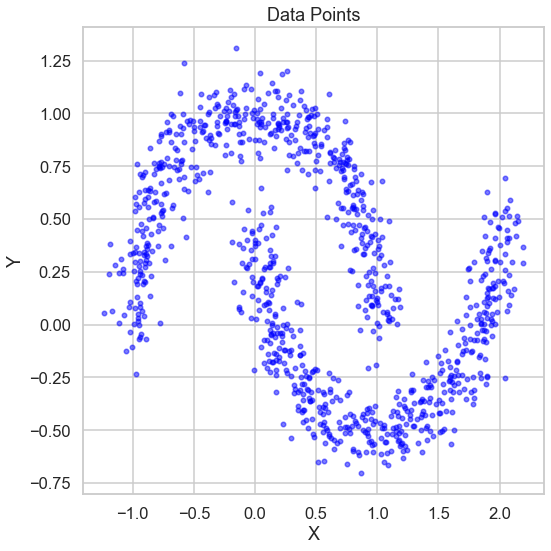

In [21]:
n_samples = 1000
X3, y = noisy_moons = make_moons(n_samples=n_samples, noise= .1)
display_cluster(X3)

## 3. Testing the GUC_Kmean function on Simple 2D
1. Apply the GUC_Kmean fucntion to 2D Data provided by example 1, Example 2 and Example 3
2. Try a varing number of cluster centriods that range from 2 to 10 clusters on each set 
3. Display your results.
4. plot the Cluster perfromance Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

[array([[ 1.00000000e+00,  0.00000000e+00],
       [ 9.51056516e-01,  3.09016994e-01],
       [ 8.09016994e-01,  5.87785252e-01],
       [ 5.87785252e-01,  8.09016994e-01],
       [ 3.09016994e-01,  9.51056516e-01],
       [ 6.12323400e-17,  1.00000000e+00],
       [-3.09016994e-01,  9.51056516e-01],
       [-5.87785252e-01,  8.09016994e-01],
       [-8.09016994e-01,  5.87785252e-01],
       [-9.51056516e-01,  3.09016994e-01],
       [-1.00000000e+00,  1.22464680e-16],
       [-9.51056516e-01, -3.09016994e-01],
       [-8.09016994e-01, -5.87785252e-01],
       [-5.87785252e-01, -8.09016994e-01],
       [-3.09016994e-01, -9.51056516e-01],
       [-1.83697020e-16, -1.00000000e+00],
       [ 3.09016994e-01, -9.51056516e-01],
       [ 5.87785252e-01, -8.09016994e-01],
       [ 8.09016994e-01, -5.87785252e-01],
       [ 9.51056516e-01, -3.09016994e-01]]), array([[-2.50328585, -3.1382643 ],
       [-2.35231146, -1.47697014],
       [-3.23415337, -3.23413696],
       ...,
       [ 9.35144821,

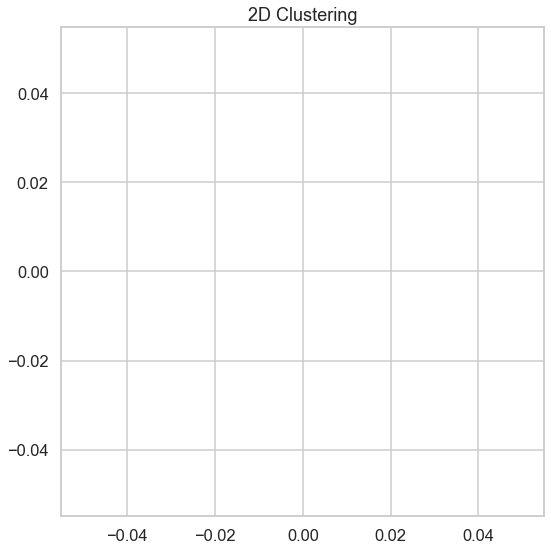

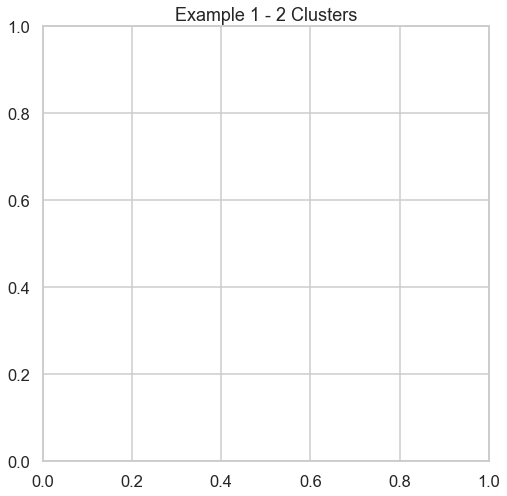

[[3.         7.07106781]
 [3.06456324 6.89181775]
 [3.24466702 6.81277796]
 [3.50681023 6.845174  ]
 [3.81154353 6.98435616]
 [4.12310563 7.21110255]
 [4.41272432 7.49650844]
 [4.65857081 7.80789684]
 [4.84480505 8.11359054]
 [4.96069069 8.38585167]
 [5.         8.60232527]
 [4.96069069 8.74659066]
 [4.84480505 8.80829475]
 [4.65857081 8.78314255]
 [4.41272432 8.67287548]
 [4.12310563 8.48528137]
 [3.81154353 8.23421892]
 [3.50681023 7.93956843]
 [3.24466702 7.62690295]
 [3.06456324 7.32649246]]
1.0


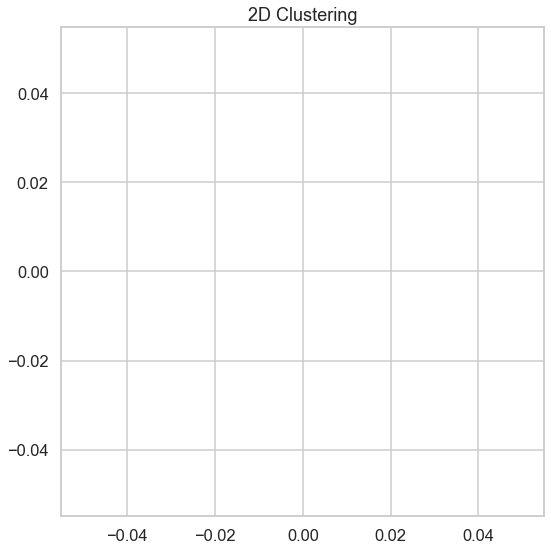

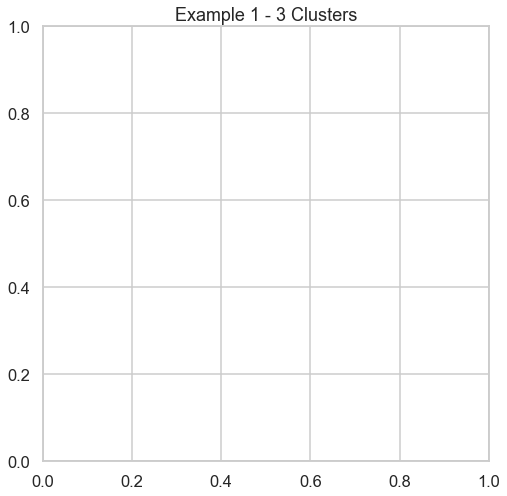

[[3.         7.07106781]
 [3.06456324 6.89181775]
 [3.24466702 6.81277796]
 [3.50681023 6.845174  ]
 [3.81154353 6.98435616]
 [4.12310563 7.21110255]
 [4.41272432 7.49650844]
 [4.65857081 7.80789684]
 [4.84480505 8.11359054]
 [4.96069069 8.38585167]
 [5.         8.60232527]
 [4.96069069 8.74659066]
 [4.84480505 8.80829475]
 [4.65857081 8.78314255]
 [4.41272432 8.67287548]
 [4.12310563 8.48528137]
 [3.81154353 8.23421892]
 [3.50681023 7.93956843]
 [3.24466702 7.62690295]
 [3.06456324 7.32649246]]
1.0


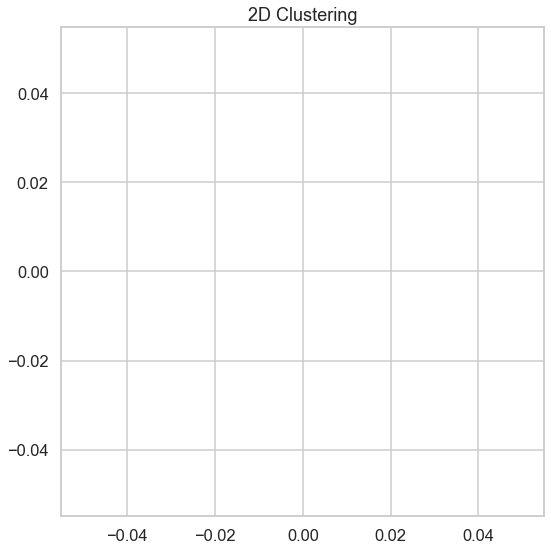

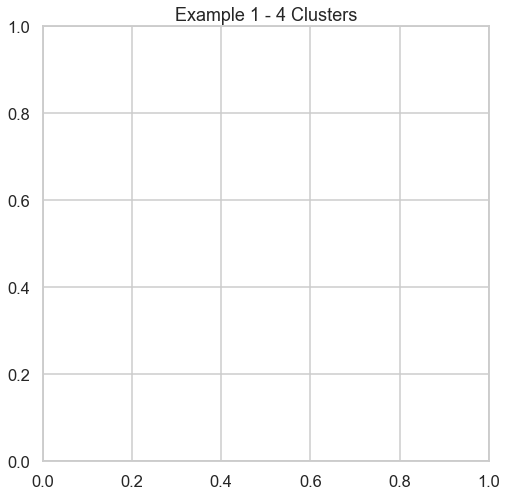

[[3.         7.07106781]
 [3.06456324 6.89181775]
 [3.24466702 6.81277796]
 [3.50681023 6.845174  ]
 [3.81154353 6.98435616]
 [4.12310563 7.21110255]
 [4.41272432 7.49650844]
 [4.65857081 7.80789684]
 [4.84480505 8.11359054]
 [4.96069069 8.38585167]
 [5.         8.60232527]
 [4.96069069 8.74659066]
 [4.84480505 8.80829475]
 [4.65857081 8.78314255]
 [4.41272432 8.67287548]
 [4.12310563 8.48528137]
 [3.81154353 8.23421892]
 [3.50681023 7.93956843]
 [3.24466702 7.62690295]
 [3.06456324 7.32649246]]
1.0


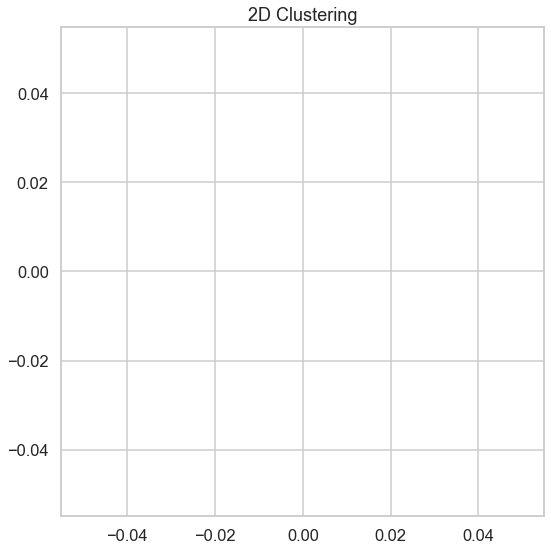

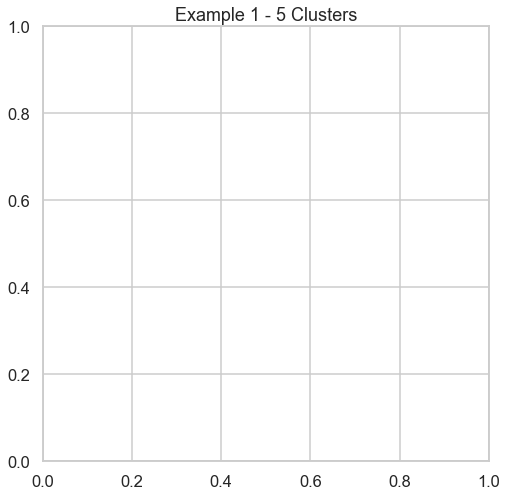

[[3.         7.07106781]
 [3.06456324 6.89181775]
 [3.24466702 6.81277796]
 [3.50681023 6.845174  ]
 [3.81154353 6.98435616]
 [4.12310563 7.21110255]
 [4.41272432 7.49650844]
 [4.65857081 7.80789684]
 [4.84480505 8.11359054]
 [4.96069069 8.38585167]
 [5.         8.60232527]
 [4.96069069 8.74659066]
 [4.84480505 8.80829475]
 [4.65857081 8.78314255]
 [4.41272432 8.67287548]
 [4.12310563 8.48528137]
 [3.81154353 8.23421892]
 [3.50681023 7.93956843]
 [3.24466702 7.62690295]
 [3.06456324 7.32649246]]
1.0


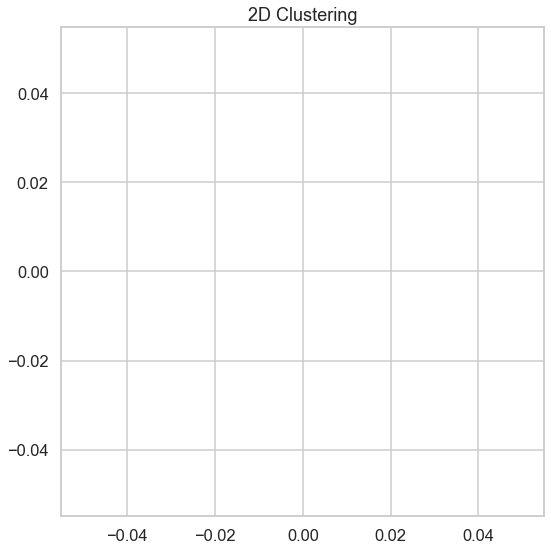

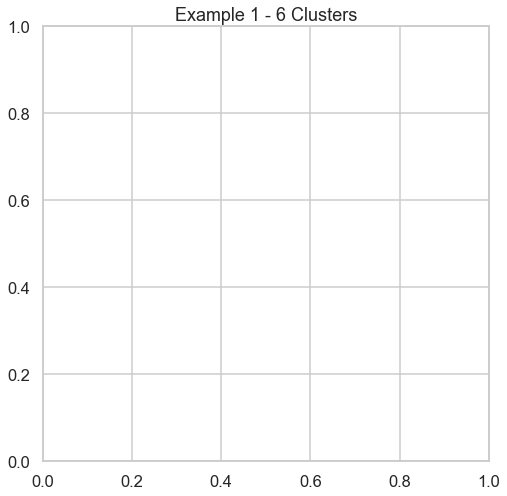

[[3.         7.07106781]
 [3.06456324 6.89181775]
 [3.24466702 6.81277796]
 [3.50681023 6.845174  ]
 [3.81154353 6.98435616]
 [4.12310563 7.21110255]
 [4.41272432 7.49650844]
 [4.65857081 7.80789684]
 [4.84480505 8.11359054]
 [4.96069069 8.38585167]
 [5.         8.60232527]
 [4.96069069 8.74659066]
 [4.84480505 8.80829475]
 [4.65857081 8.78314255]
 [4.41272432 8.67287548]
 [4.12310563 8.48528137]
 [3.81154353 8.23421892]
 [3.50681023 7.93956843]
 [3.24466702 7.62690295]
 [3.06456324 7.32649246]]
1.0


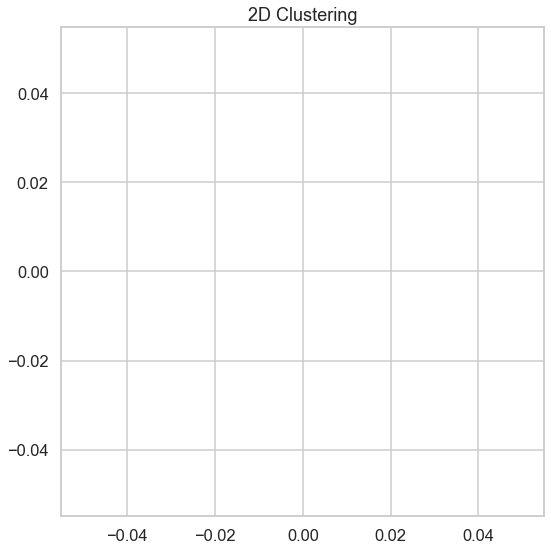

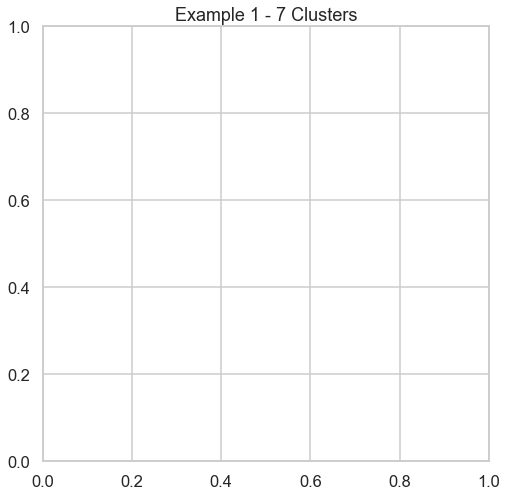

[[3.         7.07106781]
 [3.06456324 6.89181775]
 [3.24466702 6.81277796]
 [3.50681023 6.845174  ]
 [3.81154353 6.98435616]
 [4.12310563 7.21110255]
 [4.41272432 7.49650844]
 [4.65857081 7.80789684]
 [4.84480505 8.11359054]
 [4.96069069 8.38585167]
 [5.         8.60232527]
 [4.96069069 8.74659066]
 [4.84480505 8.80829475]
 [4.65857081 8.78314255]
 [4.41272432 8.67287548]
 [4.12310563 8.48528137]
 [3.81154353 8.23421892]
 [3.50681023 7.93956843]
 [3.24466702 7.62690295]
 [3.06456324 7.32649246]]
1.0


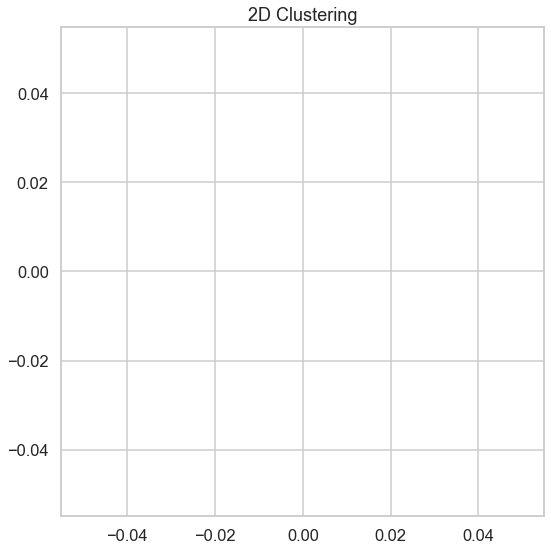

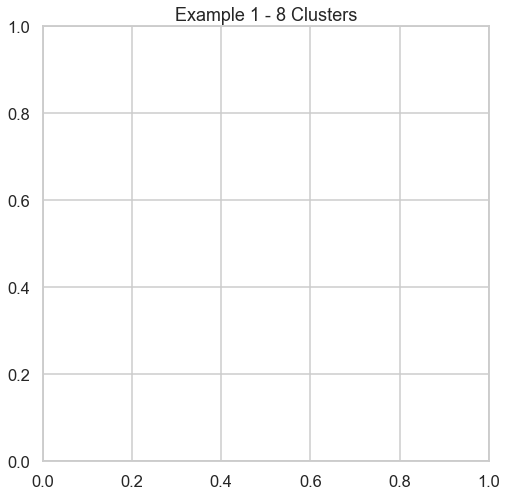

[[3.         7.07106781]
 [3.06456324 6.89181775]
 [3.24466702 6.81277796]
 [3.50681023 6.845174  ]
 [3.81154353 6.98435616]
 [4.12310563 7.21110255]
 [4.41272432 7.49650844]
 [4.65857081 7.80789684]
 [4.84480505 8.11359054]
 [4.96069069 8.38585167]
 [5.         8.60232527]
 [4.96069069 8.74659066]
 [4.84480505 8.80829475]
 [4.65857081 8.78314255]
 [4.41272432 8.67287548]
 [4.12310563 8.48528137]
 [3.81154353 8.23421892]
 [3.50681023 7.93956843]
 [3.24466702 7.62690295]
 [3.06456324 7.32649246]]
1.0


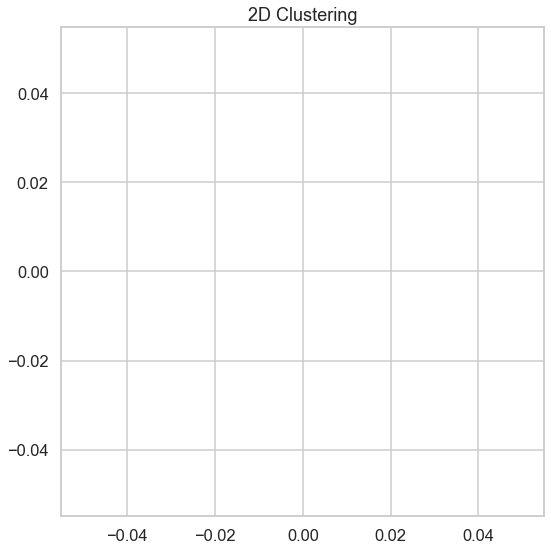

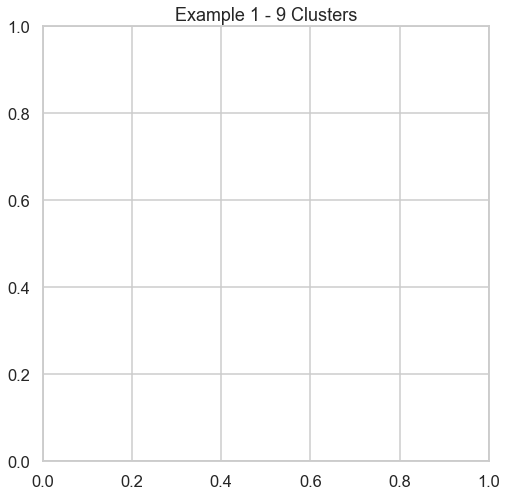

[[3.         7.07106781]
 [3.06456324 6.89181775]
 [3.24466702 6.81277796]
 [3.50681023 6.845174  ]
 [3.81154353 6.98435616]
 [4.12310563 7.21110255]
 [4.41272432 7.49650844]
 [4.65857081 7.80789684]
 [4.84480505 8.11359054]
 [4.96069069 8.38585167]
 [5.         8.60232527]
 [4.96069069 8.74659066]
 [4.84480505 8.80829475]
 [4.65857081 8.78314255]
 [4.41272432 8.67287548]
 [4.12310563 8.48528137]
 [3.81154353 8.23421892]
 [3.50681023 7.93956843]
 [3.24466702 7.62690295]
 [3.06456324 7.32649246]]
1.0


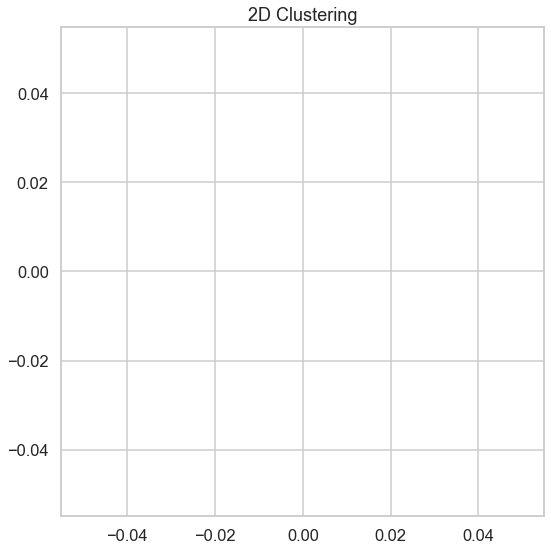

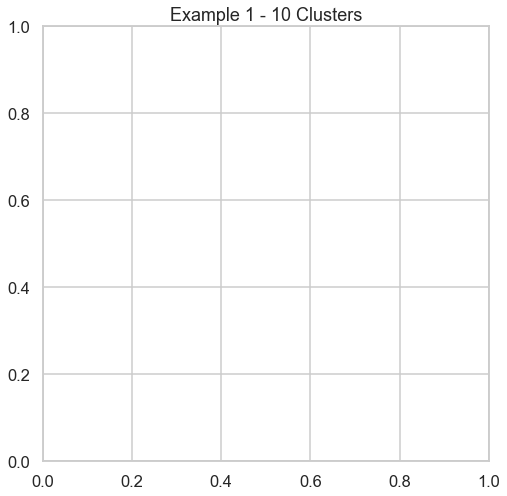

[[ 7.22090227 11.77018335]
 [ 6.52175603 10.56940154]
 [ 7.92417926 12.37217038]
 ...
 [11.40376796  6.07771573]
 [ 9.5204753   4.30862873]
 [ 9.56778729  4.31785223]]
226.29162513204741


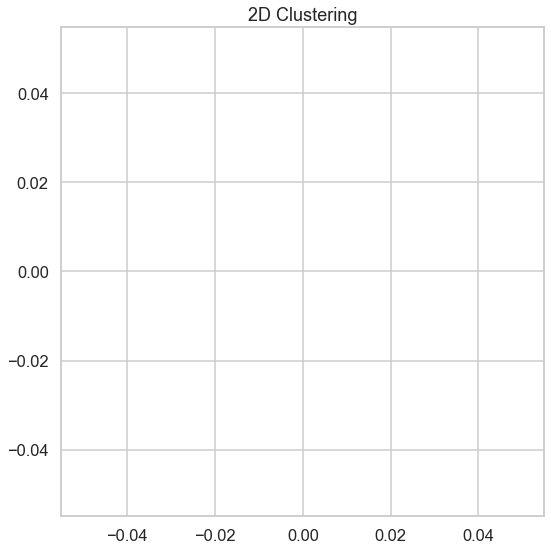

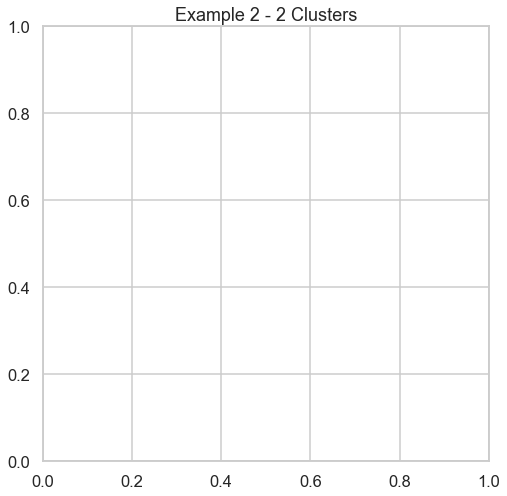

[[ 7.22090227 11.77018335]
 [ 6.52175603 10.56940154]
 [ 7.92417926 12.37217038]
 ...
 [11.40376796  6.07771573]
 [ 9.5204753   4.30862873]
 [ 9.56778729  4.31785223]]
226.29162513204741


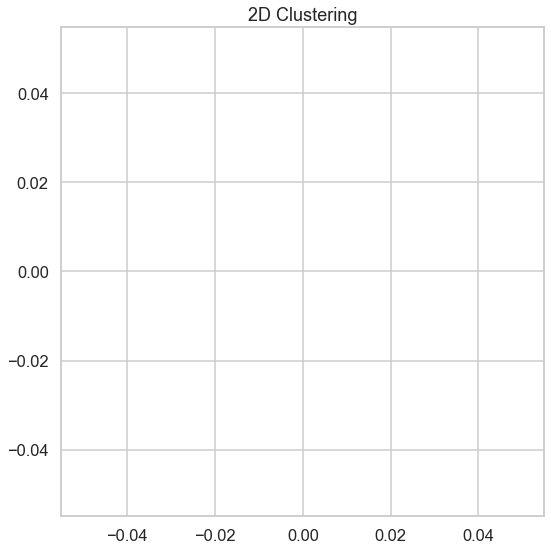

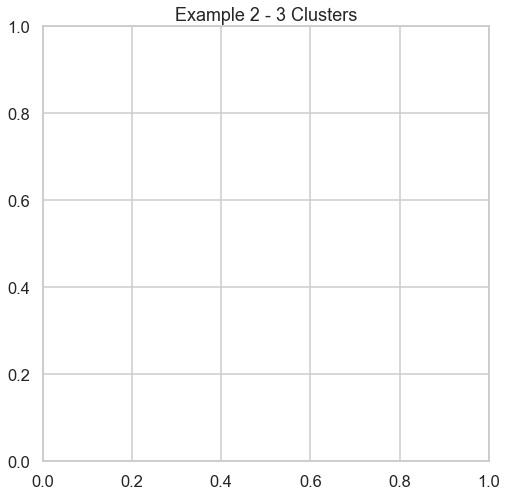

[[ 7.22090227 11.77018335]
 [ 6.52175603 10.56940154]
 [ 7.92417926 12.37217038]
 ...
 [11.40376796  6.07771573]
 [ 9.5204753   4.30862873]
 [ 9.56778729  4.31785223]]
226.29162513204741


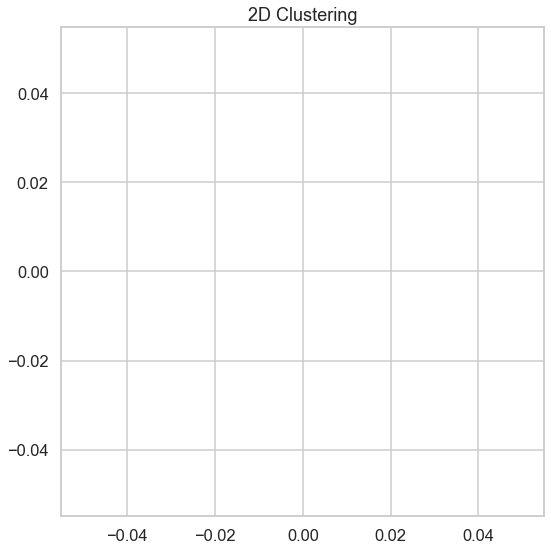

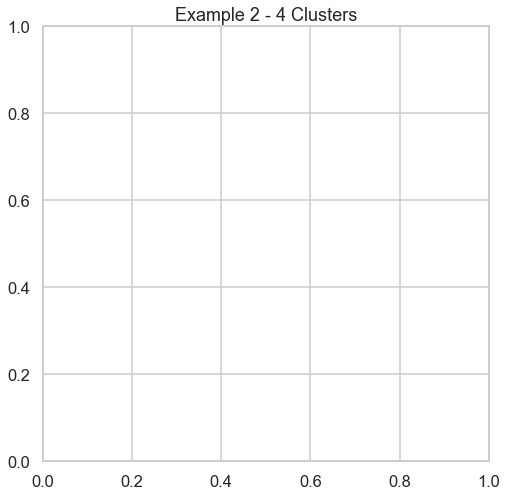

[[ 7.22090227 11.77018335]
 [ 6.52175603 10.56940154]
 [ 7.92417926 12.37217038]
 ...
 [11.40376796  6.07771573]
 [ 9.5204753   4.30862873]
 [ 9.56778729  4.31785223]]
226.29162513204741


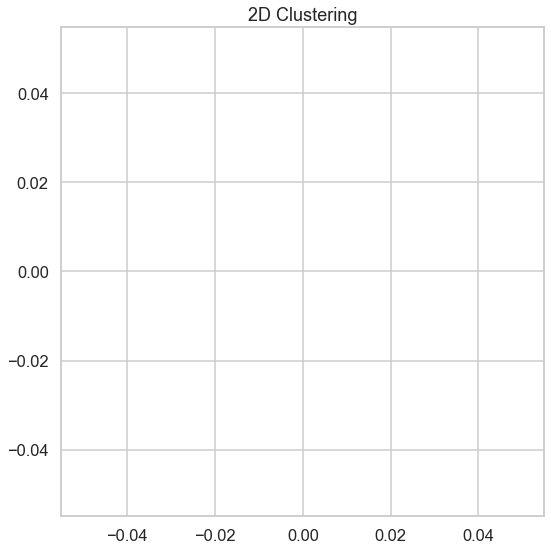

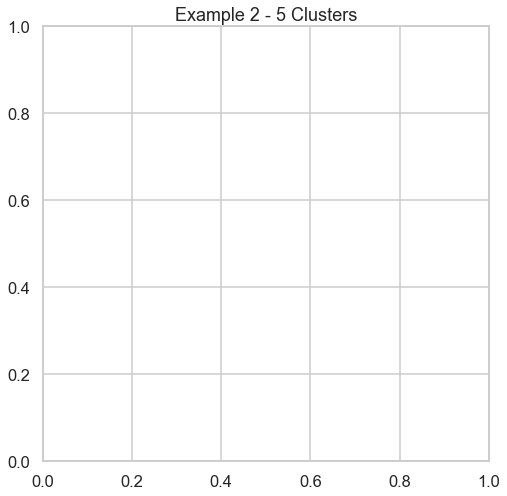

[[ 7.22090227 11.77018335]
 [ 6.52175603 10.56940154]
 [ 7.92417926 12.37217038]
 ...
 [11.40376796  6.07771573]
 [ 9.5204753   4.30862873]
 [ 9.56778729  4.31785223]]
226.29162513204741


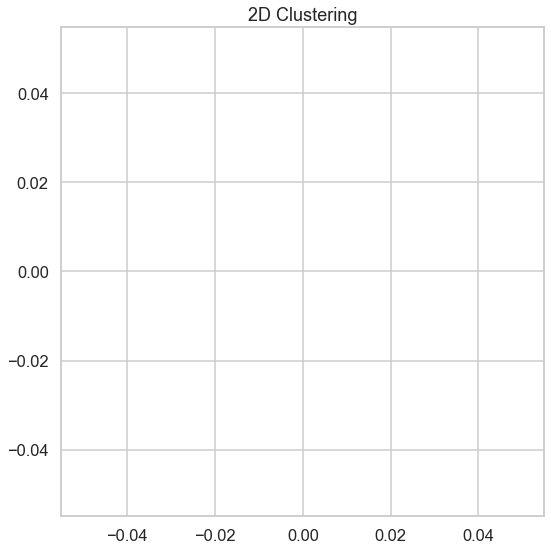

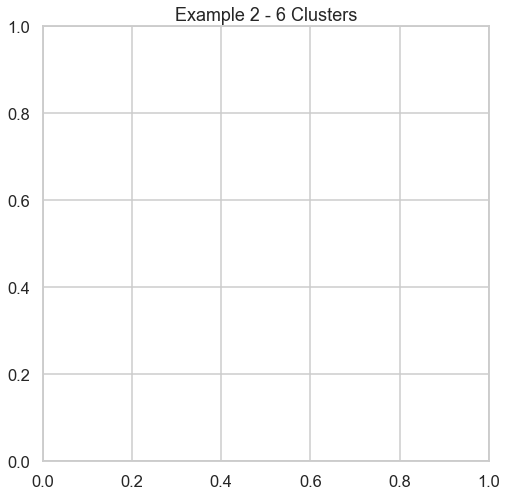

[[ 7.22090227 11.77018335]
 [ 6.52175603 10.56940154]
 [ 7.92417926 12.37217038]
 ...
 [11.40376796  6.07771573]
 [ 9.5204753   4.30862873]
 [ 9.56778729  4.31785223]]
226.29162513204741


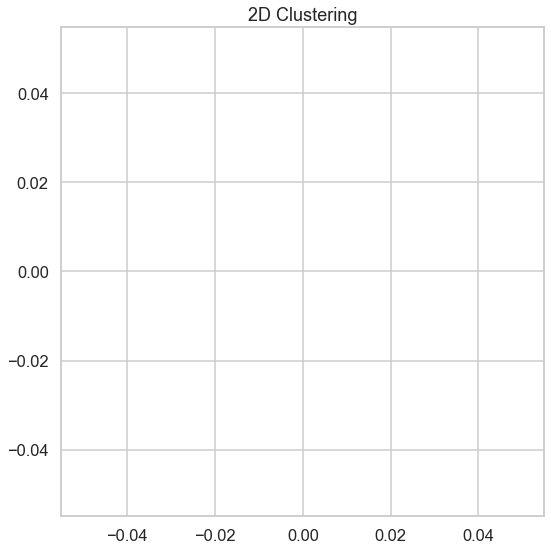

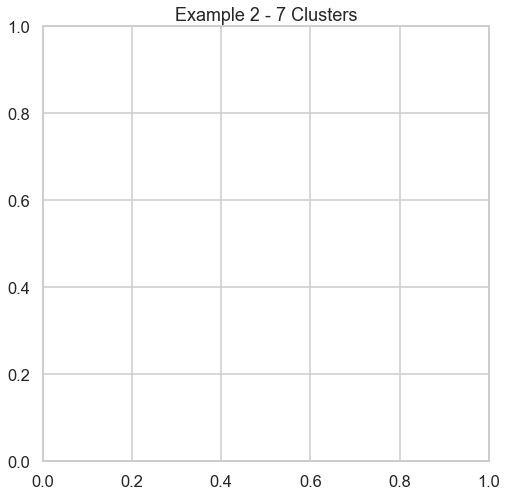

[[ 7.22090227 11.77018335]
 [ 6.52175603 10.56940154]
 [ 7.92417926 12.37217038]
 ...
 [11.40376796  6.07771573]
 [ 9.5204753   4.30862873]
 [ 9.56778729  4.31785223]]
226.29162513204741


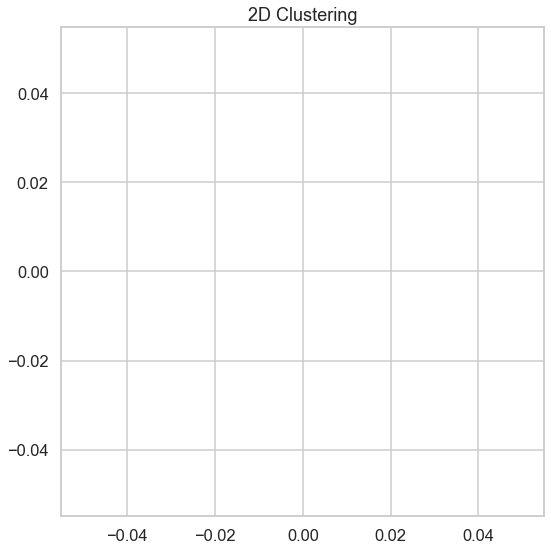

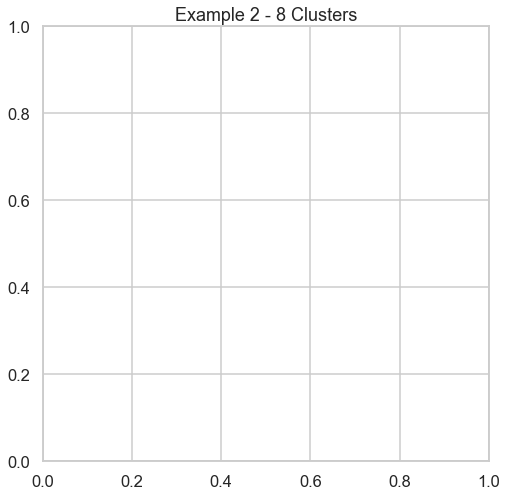

[[ 7.22090227 11.77018335]
 [ 6.52175603 10.56940154]
 [ 7.92417926 12.37217038]
 ...
 [11.40376796  6.07771573]
 [ 9.5204753   4.30862873]
 [ 9.56778729  4.31785223]]
226.29162513204741


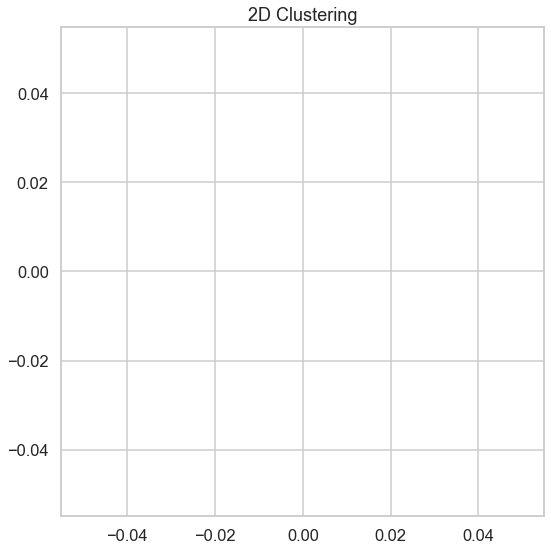

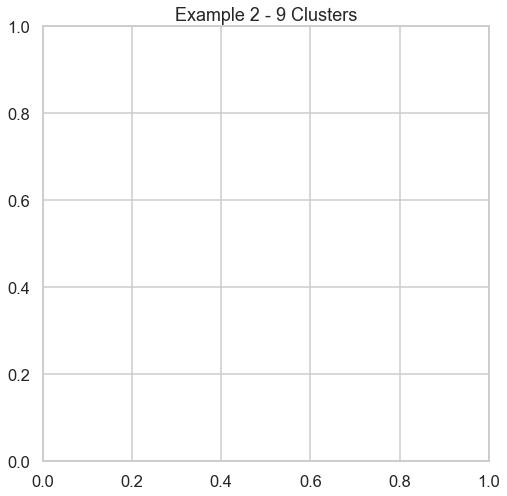

[[ 7.22090227 11.77018335]
 [ 6.52175603 10.56940154]
 [ 7.92417926 12.37217038]
 ...
 [11.40376796  6.07771573]
 [ 9.5204753   4.30862873]
 [ 9.56778729  4.31785223]]
226.29162513204741


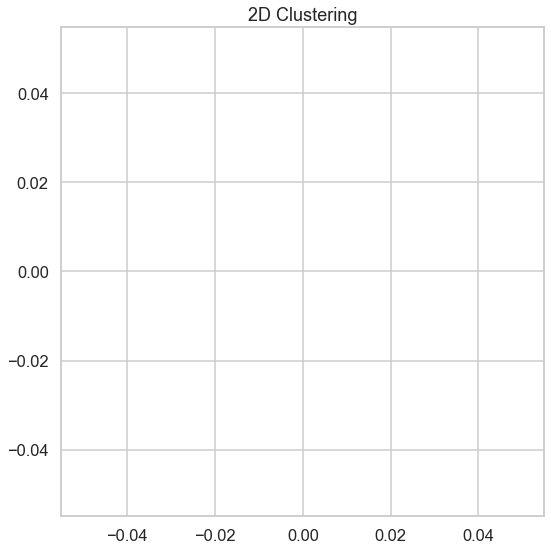

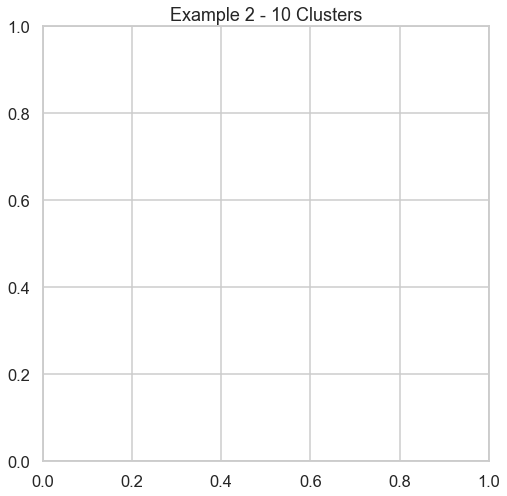

[[3.62656176 6.87331991]
 [4.97876282 8.46345969]
 [2.35463083 6.76180577]
 ...
 [3.08489164 6.99866369]
 [2.72449291 7.13543426]
 [1.82969481 6.05360541]]
1.0383673624942147


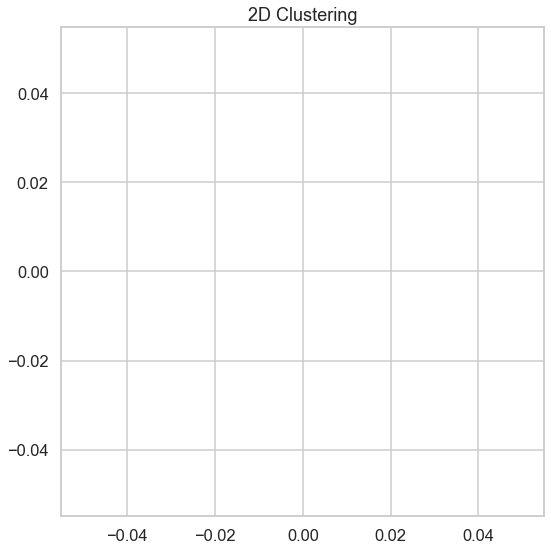

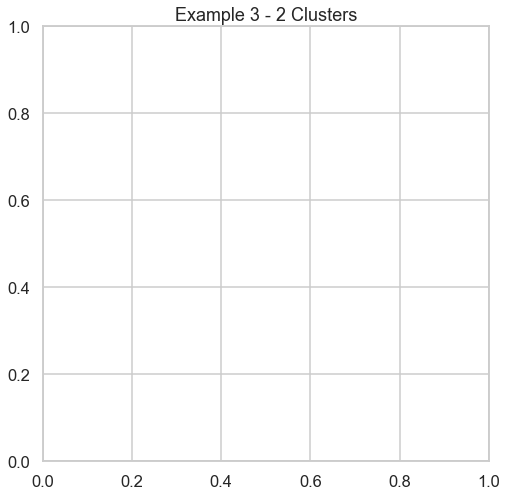

[[3.62656176 6.87331991]
 [4.97876282 8.46345969]
 [2.35463083 6.76180577]
 ...
 [3.08489164 6.99866369]
 [2.72449291 7.13543426]
 [1.82969481 6.05360541]]
1.0383673624942147


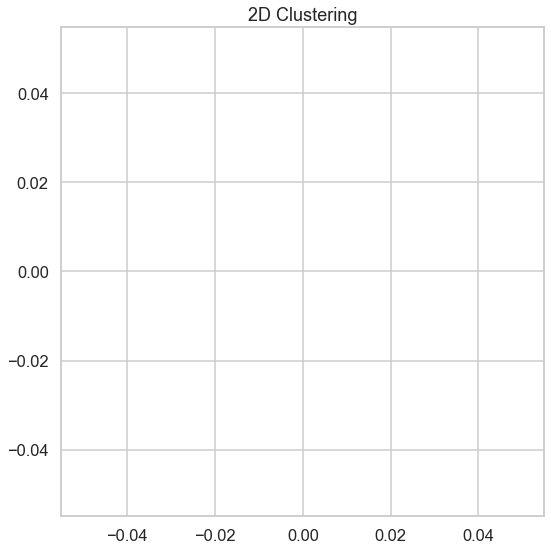

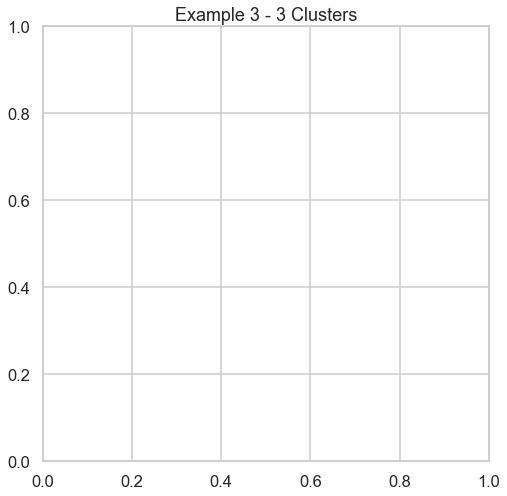

[[3.62656176 6.87331991]
 [4.97876282 8.46345969]
 [2.35463083 6.76180577]
 ...
 [3.08489164 6.99866369]
 [2.72449291 7.13543426]
 [1.82969481 6.05360541]]
1.0383673624942147


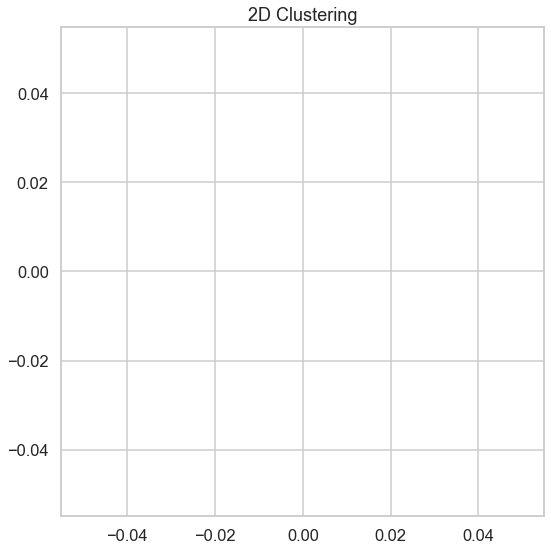

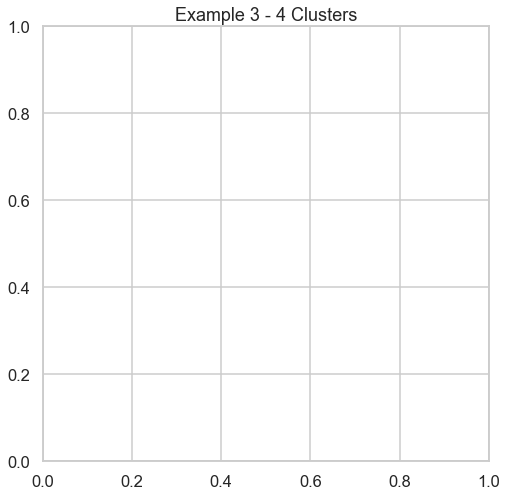

[[3.62656176 6.87331991]
 [4.97876282 8.46345969]
 [2.35463083 6.76180577]
 ...
 [3.08489164 6.99866369]
 [2.72449291 7.13543426]
 [1.82969481 6.05360541]]
1.0383673624942147


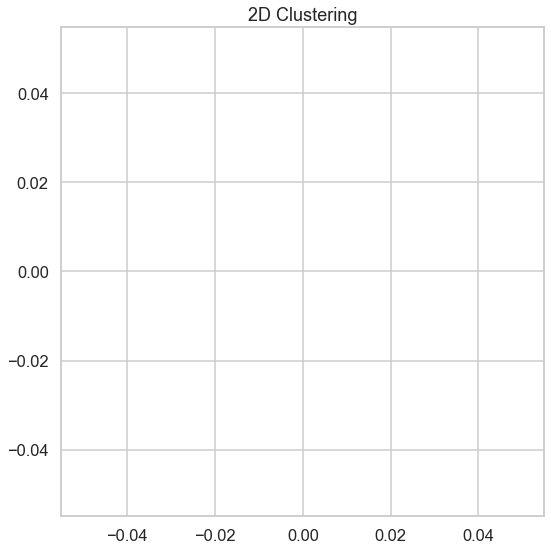

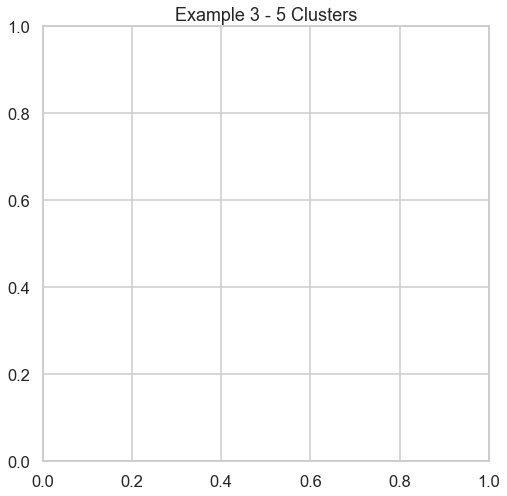

[[3.62656176 6.87331991]
 [4.97876282 8.46345969]
 [2.35463083 6.76180577]
 ...
 [3.08489164 6.99866369]
 [2.72449291 7.13543426]
 [1.82969481 6.05360541]]
1.0383673624942147


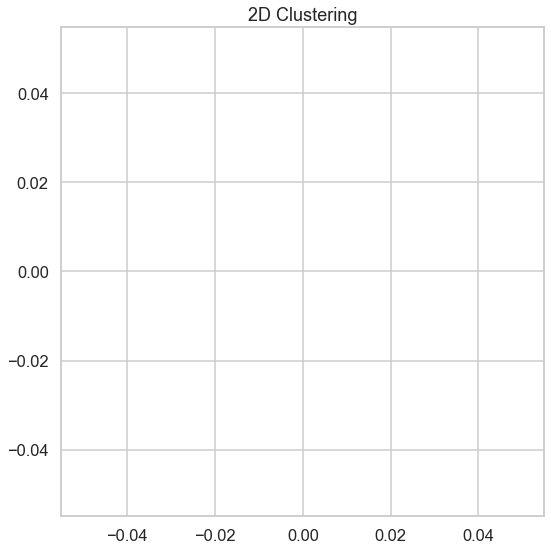

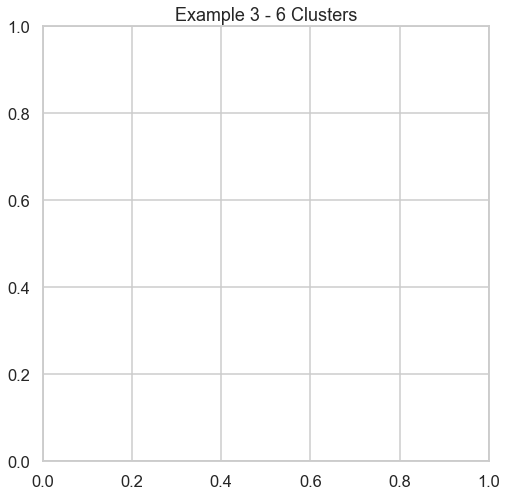

[[3.62656176 6.87331991]
 [4.97876282 8.46345969]
 [2.35463083 6.76180577]
 ...
 [3.08489164 6.99866369]
 [2.72449291 7.13543426]
 [1.82969481 6.05360541]]
1.0383673624942147


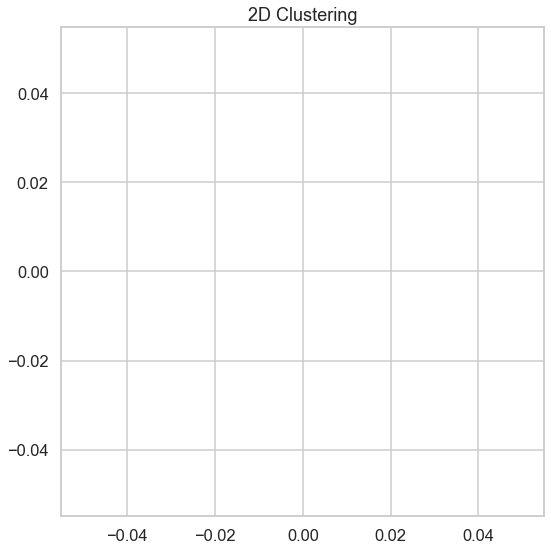

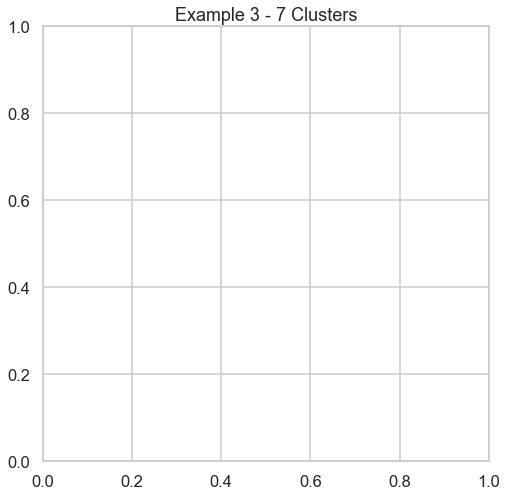

[[3.62656176 6.87331991]
 [4.97876282 8.46345969]
 [2.35463083 6.76180577]
 ...
 [3.08489164 6.99866369]
 [2.72449291 7.13543426]
 [1.82969481 6.05360541]]
1.0383673624942147


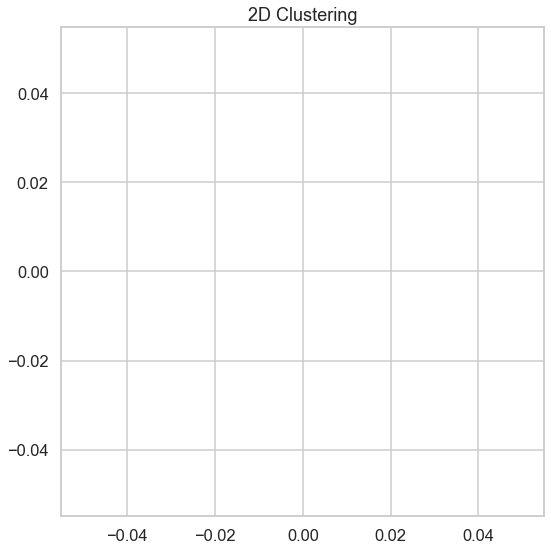

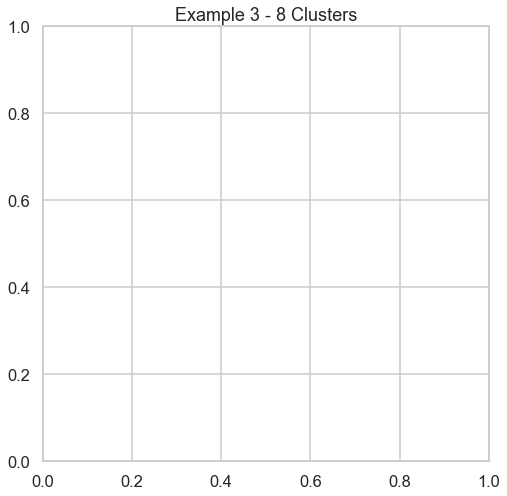

[[3.62656176 6.87331991]
 [4.97876282 8.46345969]
 [2.35463083 6.76180577]
 ...
 [3.08489164 6.99866369]
 [2.72449291 7.13543426]
 [1.82969481 6.05360541]]
1.0383673624942147


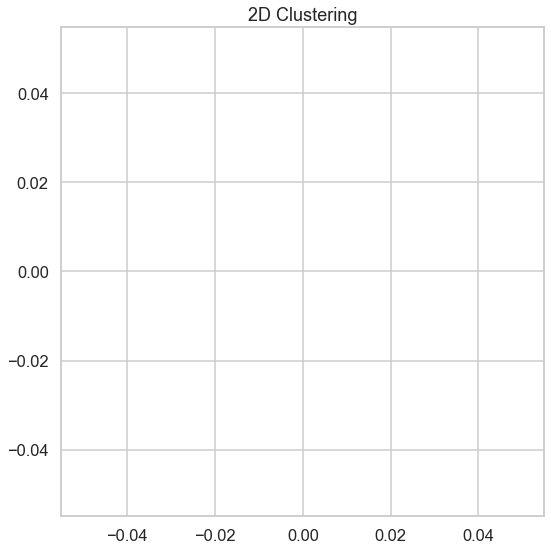

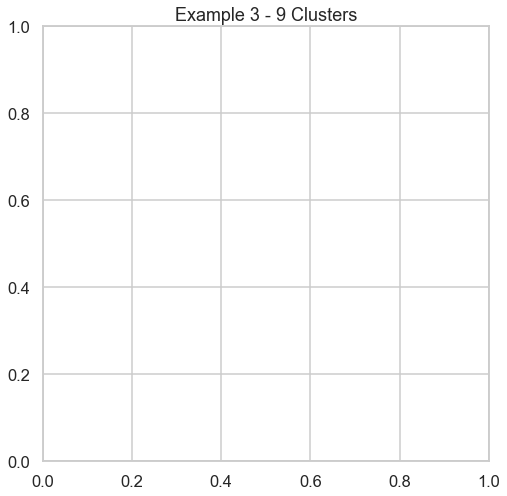

[[3.62656176 6.87331991]
 [4.97876282 8.46345969]
 [2.35463083 6.76180577]
 ...
 [3.08489164 6.99866369]
 [2.72449291 7.13543426]
 [1.82969481 6.05360541]]
1.0383673624942147


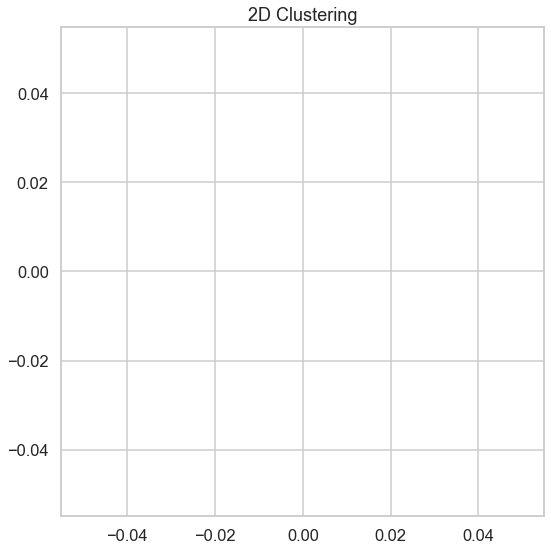

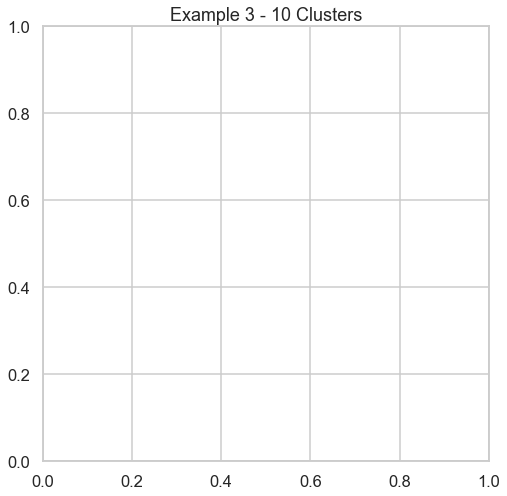

In [116]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming X1, X2, and X3 are your 2D datasets for Example 1, Example 2, and Example 3
data = [X1, X2, X3]
print(data)

# Function to apply GUC_Kmean and display clusters
def test(data, num_clusters_range, Distance_Type, Cluster_Centroids):
    for idx, X in enumerate(data):
        for num_clusters in num_clusters_range:
            # Apply GUC_Kmean function
            GUC_Kmean_result = GUC_Kmean(Cluster_Centroids, X, Distance_Type)
            
            # Display clusters using the display_cluster function
            display_cluster1(X, GUC_Kmean_result, num_clusters=num_clusters)
            
            # Plot the results
            plt.title(f'Example {idx + 1} - {num_clusters} Clusters')
            plt.show()

# Varying number of cluster centroids from 2 to 10
num_clusters_range = range(2, 11)
centroids = np.array([[4, 0], [6, 5]])

# Apply and display for each dataset
test(data, num_clusters_range, "Euclidean", centroids)


## 4. Using the GUC_Kmean function to segment customers int he provided customer dataset
1. Apply the GUC_Kmean fucntion to customer data  
2. Try a varing number of cluster that range from 2 to 10 cluster on each set 
3. Display your results.
4. plot the Cluster Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

In [125]:
import pandas as pd
data = pd.read_csv(r"C:/Users/yomna/Downloads/kmeans/Customer data.csv")
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans



def test(data, num_clusters_range, Distance_Type, Cluster_Centroids):
    for idx, df in enumerate(data):
        for num_clusters in num_clusters_range:
            # Apply GUC_Kmean function
            GUC_Kmean_result = GUC_Kmean(Cluster_Centroids, df.values, Distance_Type)
            
            # Display clusters using the display_cluster function
            display_cluster1(df.values, GUC_Kmean_result, num_clusters=num_clusters)
            
            # Plot the results
            plt.title(f'Example {idx + 1} - {num_clusters} Clusters')
            plt.show()

# Varying number of cluster centroids from 2 to 10
num_clusters_range = range(2, 11)
centroids = np.array([[4, 0], [6, 5]])

# Assuming data is a list of DataFrames
test(data, num_clusters_range, "Euclidean", centroids)





AttributeError: 'str' object has no attribute 'values'